### Для начала работы, нужно импортировать библиотеки для работы 

In [365]:
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Шаг 1. Обзор данных

In [368]:
df_heroes = pd.read_csv("heroes_information.csv")
df_heroes.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


Просмотрим информацию о представленной таблицы


In [370]:
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


#### Согласно документации к данным
`Unnamed` - придположительно, это id

`name` - имя персонажа

`Gender` - пол персонажа

`Eye color` - цвет глаз персонажа

`Race` - раса персонажа

`Hair color` - цвет волос

`Height` - высота персонажа

`Издатель` - Компания публикации

`Skin color` - цвет кожи

`Alignment` - намерение персонажа 

`Weight` - вес персонажа

In [373]:
df_heroes.duplicated().sum()

0

Входе просмотра были выявленны пустые значения

In [377]:
df_heroes.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


В ходе просмотра были выявлены аномальные значения

In [380]:
df_heroes.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

Отоброжжение полей, которые имеют пустые значения

просмотрим процетное отношение пустых значений

In [384]:
for col in df_heroes.columns:
    print(f"Количество пропусков: {col} = {df_heroes[col].isna().sum() / df_heroes.shape[0] * 100:.2f} %")

Количество пропусков: Unnamed: 0 = 0.00 %
Количество пропусков: name = 0.00 %
Количество пропусков: Gender = 0.00 %
Количество пропусков: Eye color = 0.00 %
Количество пропусков: Race = 0.00 %
Количество пропусков: Hair color = 0.00 %
Количество пропусков: Height = 0.00 %
Количество пропусков: Publisher = 2.04 %
Количество пропусков: Skin color = 0.00 %
Количество пропусков: Alignment = 0.00 %
Количество пропусков: Weight = 0.27 %


Просмотрели на процентное отношение пропусков, значения является не значительном, и мы их удалим

In [387]:
df_heroes.dropna(inplace=True)

In [388]:
df_heroes.isna().sum()

Unnamed: 0    0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [389]:
df_heroes.reset_index(inplace=True)

так как мы удалил значения, нужно перезаписать индексы

#### Просматривам столбцы которые имеют знак "-"

цвет глаз

In [396]:
df_heroes["Eye color"].value_counts()

Eye color
blue                       224
-                          163
brown                      123
green                       73
red                         46
black                       22
yellow                      18
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: count, dtype: int64

In [397]:
df_heroes["Race"].value_counts()

Race
-                    297
Human                204
Mutant                62
God / Eternal         14
Human / Radiation     11
                    ... 
Rodian                 1
Flora Colossus         1
Human-Vuldarian        1
Gungan                 1
Yoda's species         1
Name: count, Length: 61, dtype: int64

Волосы

In [423]:
df_heroes["Hair color"].value_counts()

Hair color
Black               317
Blond                99
Brown                85
No Hair              74
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: count, dtype: int64

In [401]:
df_heroes["Skin color"].value_counts()

Skin color
-                 649
green              21
blue                9
red                 8
white               7
silver              5
grey                4
purple              3
gold                3
yellow              2
pink                2
red / black         1
black               1
orange / white      1
gray                1
blue-white          1
orange              1
Name: count, dtype: int64

Мы просмотрели все столбцы, которые не имеют значения

#### Просматривает, что удалось заполнить пустые значения

In [406]:
# Замена данных признака Eye color, которые равны '-' на самое популярное значение
df_heroes['Eye color'] = df_heroes['Eye color'].str.replace('-', df_heroes['Eye color'].mode()[0])

In [407]:
# Замена данных признака Race, которые равны '-' на второе самое популярное значение
df_heroes['Race'] = df_heroes['Race'].str.replace('-', df_heroes[df_heroes['Race'] != '-'].Race.mode()[0])

In [410]:
# Замена данных признака Scin color, которые равны '-' на значение Alien
df_heroes['Skin color'] = df_heroes['Skin color'].str.replace('-', 'Alien')

In [411]:
# Замена данных признака Hair color, которые равны '-' на второе самое популярное значение
df_heroes['Hair color'] = df_heroes['Hair color'].str.replace('-', df_heroes[df_heroes['Hair color'] != '-']['Hair color'].mode()[0])

In [414]:
#Удалим колонку Unnamed
df_heroes.drop('Unnamed: 0', axis = 1, inplace=True)

In [417]:
df_heroes

,index,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Alien,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Alien,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,Alien,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
714,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Alien,good,52.0
715,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
716,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
717,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Alien,good,57.0


In [426]:
#Заменяем отрицательные числа на положительные
df_heroes["Height"] = df_heroes["Height"].abs()
df_heroes["Weight"] = df_heroes["Weight"].abs()

In [428]:
df_heroes.describe()

,index,Height,Weight
count,719.000000,719.000000,719.000000
mean,367.877608,161.716273,108.146036
std,212.774166,63.896588,86.604001
min,0.000000,15.200000,2.000000
25%,183.500000,99.000000,74.000000
50%,369.000000,175.000000,99.000000
75%,552.500000,186.500000,99.000000
max,733.000000,975.000000,900.000000


### Шаг 2. Разведочный анализ данных

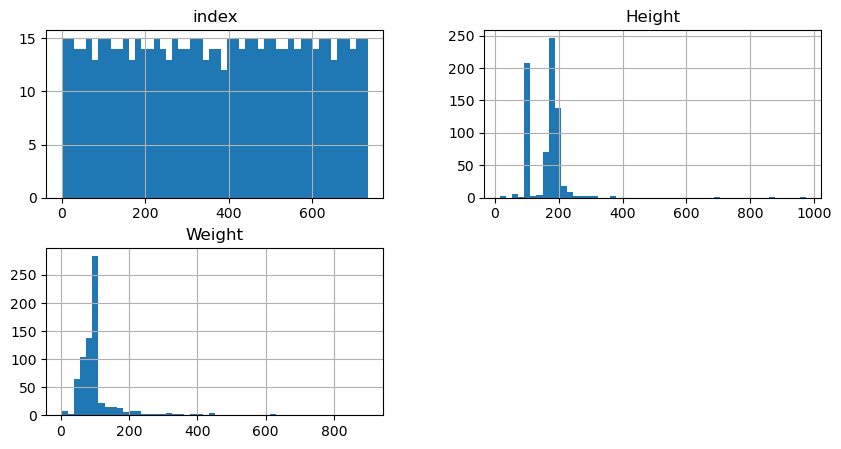

In [440]:
df_heroes.hist(figsize=(10, 5), bins=50);

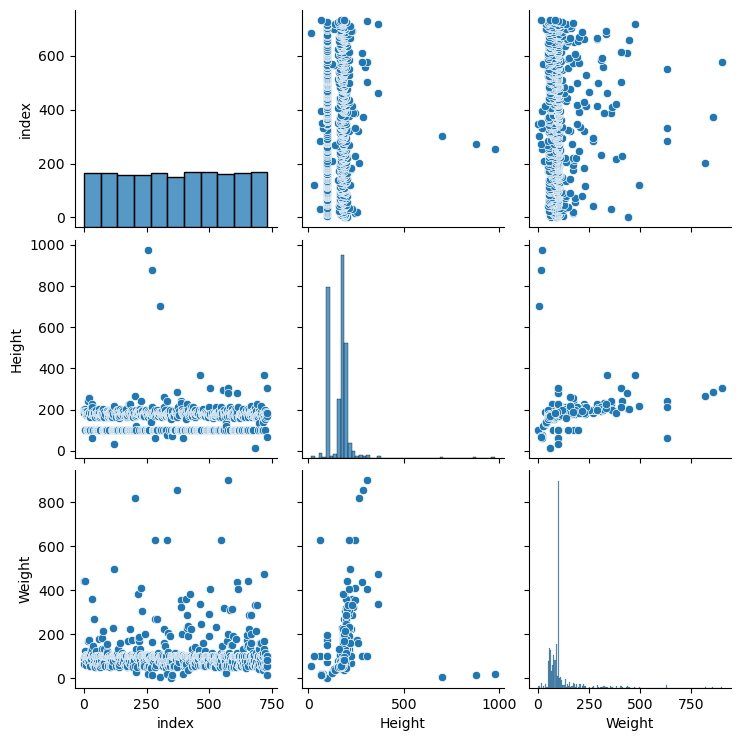

In [442]:
sns.pairplot(df_heroes)

наблюдается небольшая зависимость в Height и Weight

<Axes: >

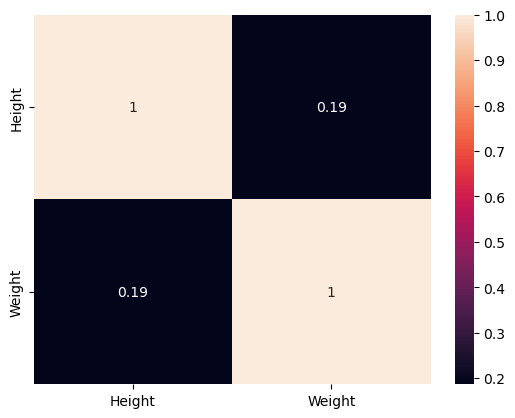

In [449]:
sns.heatmap(df_heroes[['Height', 'Weight']].corr(), annot=True)

### Шаг 3. Заклюение

`1`. Был загружен набор данных. Первые наблюдения показали, что в наборе данных есть пропуски и имеются аномальные значения. Статистика показала, что значения во всех признаках находятся не в пределах нормы.

`2`. Проведена предобработка данных. Обработали пропущенные значения и аномальные значения.

`3`. Провели разведочный анализ данных. Наблюдается небольшая зависимость между признаком Weight и Height. На рост персонажа влияет вес.